In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from src.helpers import (get_rankings_table, get_goal_difference_table,
                         get_beach_week, add_overall_rank, get_total_goals_per_match)


28 Teams, ... (28*28)-28 matches in a season = 756.

In [4]:
tables = {
    'fixtures': pd.read_csv('../data/fixtures.csv'),
    'teams': pd.read_csv('../data/teams.csv'),
    'startingXI': pd.read_csv('../data/startingXI.csv'),
    'odds': pd.read_csv('../data/odds.csv'),
    'players': pd.read_csv('../data/players.csv'),
    'results': pd.read_csv('../data/results.csv'),
}
teams_dict = pd.Series(tables['teams'].TeamName.values,index=tables['teams'].TeamID).to_dict()

In [5]:
tables['players'][tables['players']['PlayerName'].duplicated(keep=False)]

,PlayerName,TeamID,PositionID
10,Frank Smith,1,2
92,Frank Smith,12,3
244,Fred Williams,18,4
370,Robert Pitts,22,4
414,Fred Williams,24,3
650,Robert Pitts,8,1


# Data Manipulations

In [6]:
df = tables['startingXI'].merge(tables['results'], on=['MatchID'])\
                         .merge(tables['odds'], on=['MatchID'])
df['HomeYield'] = np.where(df['HomeShots'] > 0,
                                           100*(df['HomeScore'] / df['HomeShots']),
                                           0)
df['AwayYield'] = np.where(df['AwayShots'] > 0,
                                           100*(df['AwayScore'] / df['AwayShots']),
                                           0)
df['NetHomeGoals'] = df['HomeScore'] - df['AwayScore']
df['AbsGd'] = abs(df['HomeScore'] - df['AwayScore'])
df['Sin_GW'] = np.sin(2 * np.pi * df['Gameweek'] / max(df['Gameweek'])) 
df['Cos_GW'] = np.cos(2 * np.pi * df['Gameweek'] / max(df['Gameweek']))
def result(x):
    if x > 0: return 1
    elif x == 0: return 0
    else: return -1

df['result'] = df.NetHomeGoals.apply(lambda x:result(x))
variables = ['SeasonID', 'MatchID', 'HomeTeamID', 'AwayTeamID', 'HomeScore', 'HomeShots', 'AwayScore',	'AwayShots', 'HomeYield', 'AwayYield', 'NetHomeGoals', 'AbsGd', 'Sin_GW', 'Cos_GW', 'result']
def f(r):
    return r.head(1)

training_data = df[variables].groupby(df.MatchID).apply(lambda r: f(r)).reset_index(drop=True)

In [7]:
goals_s1 = get_total_goals_per_match(df, season=1)
goals_s1 = goals_s1.rename(columns=teams_dict)
goals_s2 = get_total_goals_per_match(df, season=2)
goals_s2 = goals_s2.rename(columns=teams_dict)
goals_s1=goals_s1.drop('MatchID', axis=1)
goals_s2=goals_s2.drop('MatchID', axis=1)


/Users/adam/Documents/Projects/footballpredictor/src/helpers.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[team] = 0
/Users/adam/Documents/Projects/footballpredictor/.venv/lib/python3.7/site-packages/pandas/core/indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


/Users/adam/Documents/Projects/footballpredictor/src/helpers.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[team] = 0
/Users/adam/Documents/Projects/footballpredictor/.venv/lib/python3.7/site-packages/pandas/core/indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


Text(0.5, 0, 'Number of Goals')

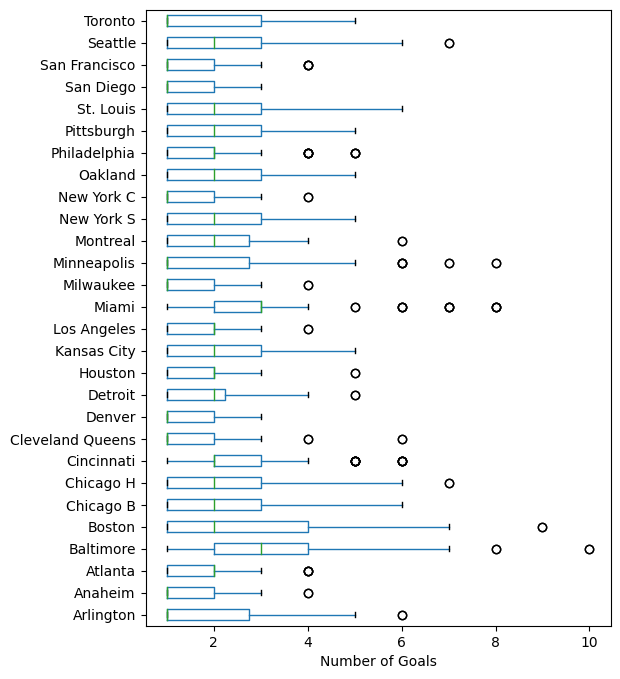

In [8]:
ax = goals_s1[goals_s1!=0].boxplot(vert=False, grid = False, figsize=(6,8))
ax.set_xlabel("Number of Goals")

Text(0.5, 0, 'Number of Goals')

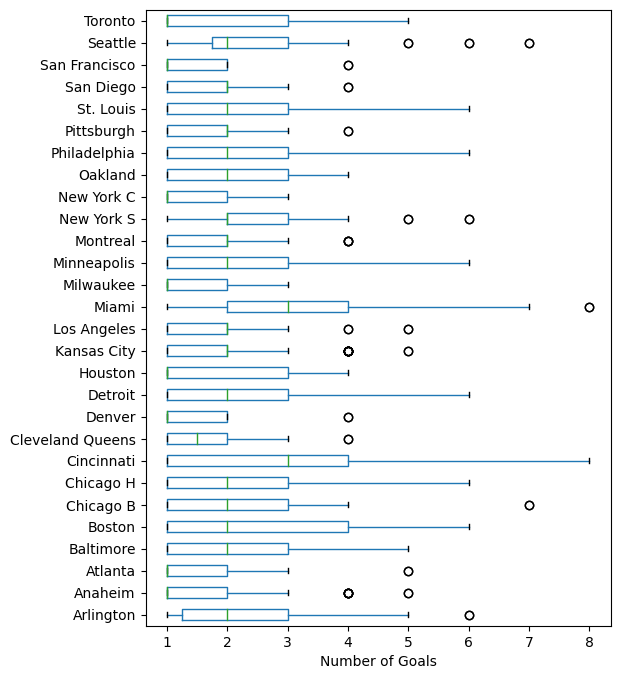

In [9]:
ax = goals_s2[goals_s2!=0].boxplot(vert=False, grid = False, figsize=(6,8))
ax.set_xlabel("Number of Goals")

# Data Visualisations

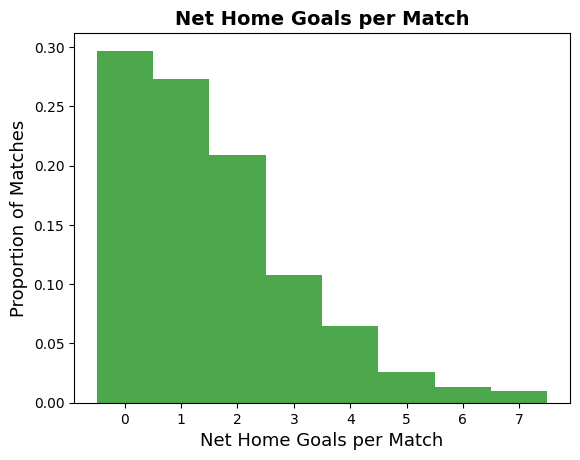

In [10]:
plt.hist(training_data[['NetHomeGoals']].values, range(9), 
         alpha=0.7, label=['NetHomeGoals'],density=True, color=["g"])

plt.xticks([i-0.5 for i in range(1,9)],[i for i in range(8)])
plt.xlabel("Net Home Goals per Match",size=13)
plt.ylabel("Proportion of Matches",size=13)
plt.title("Net Home Goals per Match",size=14,fontweight='bold')
plt.show()

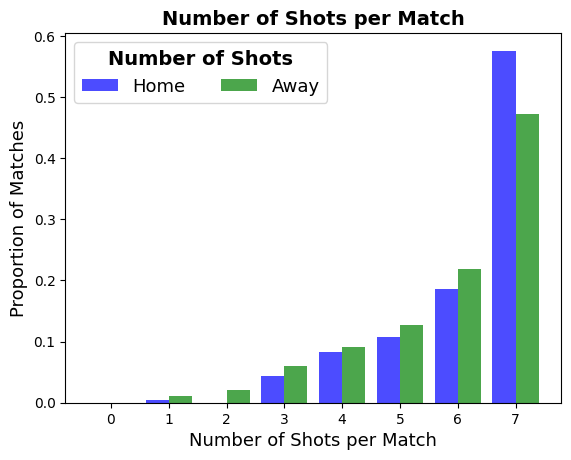

In [11]:
plt.hist(training_data[['HomeShots', 'AwayShots']].values, range(9), 
         alpha=0.7, label=['Home', 'Away'],density=True, color=["b", "g"])
leg=plt.legend(loc='upper left', fontsize=13, ncol=2)
leg.set_title("Number of Shots", prop = {'size':'14', 'weight':'bold'})

plt.xticks([i-0.5 for i in range(1,9)],[i for i in range(8)])
plt.xlabel("Number of Shots per Match",size=13)
plt.ylabel("Proportion of Matches",size=13)
plt.title("Number of Shots per Match",size=14,fontweight='bold')
plt.show()

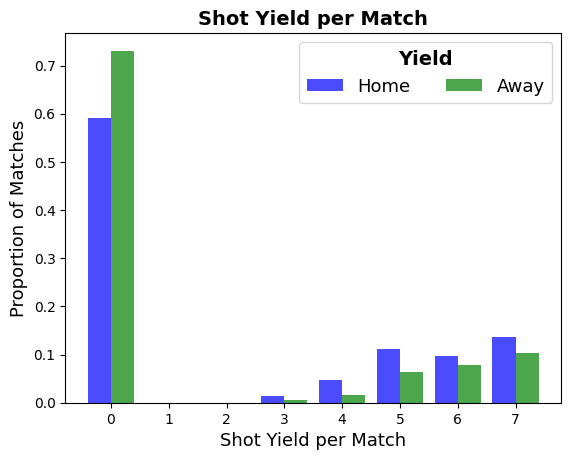

In [12]:
plt.hist(training_data[['HomeYield', 'AwayYield']].values, range(9), 
         alpha=0.7, label=['Home', 'Away'],density=True, color=["b", "g"])
leg=plt.legend(loc='upper right', fontsize=13, ncol=2)
leg.set_title("Yield", prop = {'size':'14', 'weight':'bold'})

plt.xticks([i-0.5 for i in range(1,9)],[i for i in range(8)])
plt.xlabel("Shot Yield per Match",size=13)
plt.ylabel("Proportion of Matches",size=13)
plt.title("Shot Yield per Match",size=14,fontweight='bold')
plt.show()

# Biggest Upset

In [13]:
upsets = df[df['AbsGd']==df['AbsGd'].max()].groupby('MatchID').agg('max')
if upsets.shape[0] != 1:
    upsets = upsets[upsets['NetHomeGoals']==upsets['NetHomeGoals'].max()]
upsets

,StartingXI,SeasonID,Gameweek,HomeTeamID,HomeScore,HomeShots,AwayTeamID,AwayScore,AwayShots,Home,Draw,Away,HomeYield,AwayYield,NetHomeGoals,AbsGd,Sin_GW,Cos_GW,result
MatchID,,,,,,,,,,,,,,,,,,,
620,"Stanley May,William Moulton,Ted Williams,Chris...",1,45,10,0,3,4,10,38,36.26,15.52,1.07,0.0,26.315789,-10,10,-0.866025,0.5,-1


# Final Results

In [14]:
gds_1 = get_goal_difference_table(df, season=1)
gds_2 = get_goal_difference_table(df, season=2)
gds_1 = gds_1.rename(columns=teams_dict)
gds_2 = gds_2.rename(columns=teams_dict)

/Users/adam/Documents/Projects/footballpredictor/src/helpers.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[team] = 0
/Users/adam/Documents/Projects/footballpredictor/.venv/lib/python3.7/site-packages/pandas/core/indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)
/Users/adam/Documents/Projects/footballpredictor/src/helpers.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [15]:
rankings_1 = get_rankings_table(df, season=1)
rankings = rankings_1.rename(columns=teams_dict)
idx = rankings.tail(1).index.item()
rankings = rankings.sort_values(by=idx, axis=1, ascending=False)
winner = rankings.tail(1).T.head(1).index.item()
points = rankings.tail(1).T.head(1).values[0][0]
last_match_id = idx
all_rankings = rankings.tail(1).T.rename(columns={last_match_id:'TotalPoints'}).merge(gds_1.tail(1).T.rename(columns={last_match_id:'GoalDifference'}), left_index=True, right_index=True)
all_rankings = all_rankings.sort_values(by=['TotalPoints', 'GoalDifference'], ascending=False).reset_index()
all_rankings = all_rankings.rename_axis(None, axis = 1).rename(columns={'index':'Team'})
all_rankings.index.names = ['Position']
all_rankings.index += 1 
display(all_rankings)
print(f"Season 1 was won by {winner}, on {points} points")

/Users/adam/Documents/Projects/footballpredictor/src/helpers.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[team] = 0
/Users/adam/Documents/Projects/footballpredictor/.venv/lib/python3.7/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,Team,TotalPoints,GoalDifference
Position,,,
1,Cincinnati,80,79
2,Miami,72,118
3,New York S,68,56
4,Baltimore,66,95
5,Chicago B,63,54
6,Oakland,63,32
7,Boston,61,72
8,St. Louis,61,46
9,Seattle,60,54


Season 1 was won by Cincinnati, on 80 points


In [16]:
last_match_id = rankings.tail(1).index.item()
challenger, match_id = get_beach_week(rankings)
print(f'Winners "{winner}" ({points}p) saw off a title challenge from "{challenger}" ({rankings.iloc[match_id][challenger]}p) after match {match_id}, with {last_match_id - match_id} games remaining.')

Winners "Cincinnati" (80p) saw off a title challenge from "Miami" (72p) after match 754, with 2 games remaining.


# Assigning End of season rankings to teams

In [17]:
rankings_2 = get_rankings_table(df, season=2)

idx = rankings_1.tail(1).index.item()
rankings_place_1 = rankings_1.sort_values(by=idx, axis=1, ascending=False)
rankings_place_1 = rankings_place_1.tail(1).T.reset_index()
rankings_place_1 = rankings_place_1.reset_index()
rankings_place_1 = rankings_place_1.rename(columns={'level_0':'OverallRank', 'index':'TeamID', 756: 'Points'})
rankings_place_1['OverallRank'] = rankings_place_1.OverallRank.apply(lambda x: 28 - x)
rankings_place_1['SeasonID'] = 1
rankings_place_1 = rankings_place_1[['TeamID', 'SeasonID', 'OverallRank', 'SeasonID']]

idx = rankings_2.tail(1).index.item()
rankings_place_2 = rankings_2.sort_values(by=idx, axis=1, ascending=False)
rankings_place_2 = rankings_place_2.tail(1).T.reset_index()
rankings_place_2 = rankings_place_2.reset_index()
rankings_place_2 = rankings_place_2.rename(columns={'level_0':'OverallRank', 'index':'TeamID', 756: 'Points'})
rankings_place_2['OverallRank'] = rankings_place_2.OverallRank.apply(lambda x: 28 - x)
rankings_place_2['SeasonID'] = 2
rankings_place_2 = rankings_place_2[['TeamID', 'SeasonID', 'OverallRank', 'SeasonID']]
r = pd.concat([rankings_place_1, rankings_place_2], axis=0).reset_index(drop=True)
r = r.loc[:,~r.columns.duplicated()]

/Users/adam/Documents/Projects/footballpredictor/src/helpers.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[team] = 0
/Users/adam/Documents/Projects/footballpredictor/.venv/lib/python3.7/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [19]:
df = add_overall_rank(training_data, r)

df['HomeTeamName'] = df['HomeTeamID']
df['HomeTeamName'] = df['HomeTeamName'].map(teams_dict).fillna(df['HomeTeamName'])
df['AwayTeamName'] = df['AwayTeamID']
df['AwayTeamName'] = df['AwayTeamName'].map(teams_dict).fillna(df['AwayTeamName'])

df.to_csv('../intermediate/training_data.csv')